# Classification - House Grade Prediction

In [1]:
#import Library to import data
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("D:\Data Science\Mini Project\DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
df.sample(5)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
2934,2935,353,9,6,5,6,NO,0,115,5,47,2,5163,B
1209,1210,300,9,8,8,9,YES,92,104,7,86,4,4615,A
1781,1782,323,5,4,4,6,NO,0,89,3,66,3,3338,D
203,204,327,5,3,2,3,YES,112,75,2,41,2,2924,D
2333,2334,300,7,4,4,6,NO,0,116,4,78,1,3245,D


In [4]:
df.shape

(3000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


In [8]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

# EDA 

In [9]:
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


### Grade of houses 

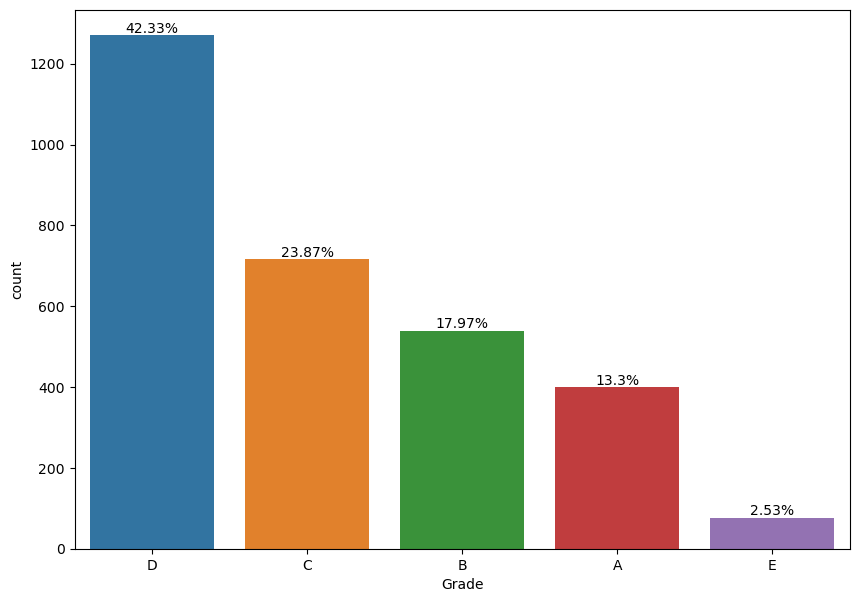

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Grade"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

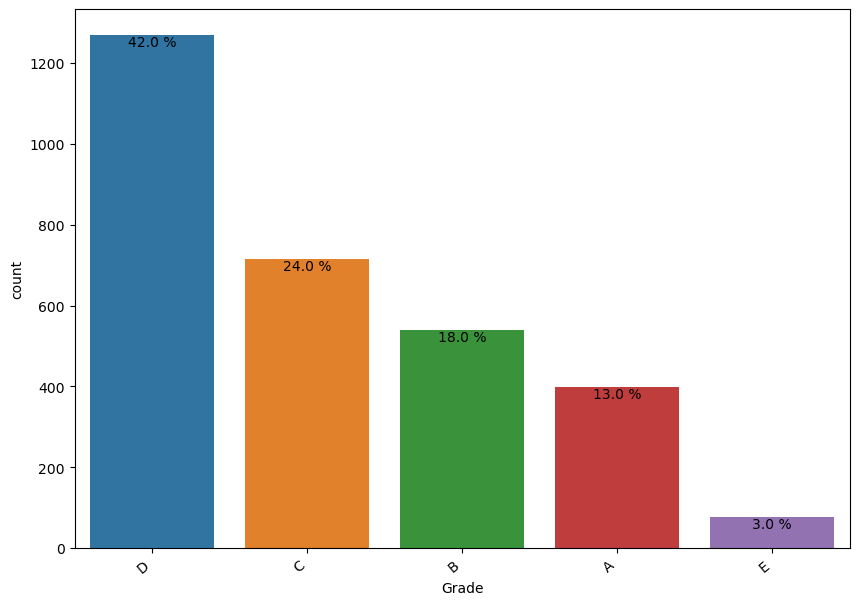

In [11]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Grade"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right") # set_xticklabels is used to set the labels of the x axis
                                                                       # ax.get_xtickslabels() returns all the labels that we need to print
                                                                       # rotation: rotate the xlabels at angle provided, and
                                                                       # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right
count = len(df["Trooms"])                                     # counting the number of rows in whole dataset
for bar in ax.patches:                                                 # ax.patches returns the rectange object from matplotlib 
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           # first it calculate the bar heightand then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectangle bar.
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          # va: Vertical axis: -> top means percentage would bneath the bar head
                                                                        # annotate: used to annotate over objects. here objects are the bars 
plt.show()

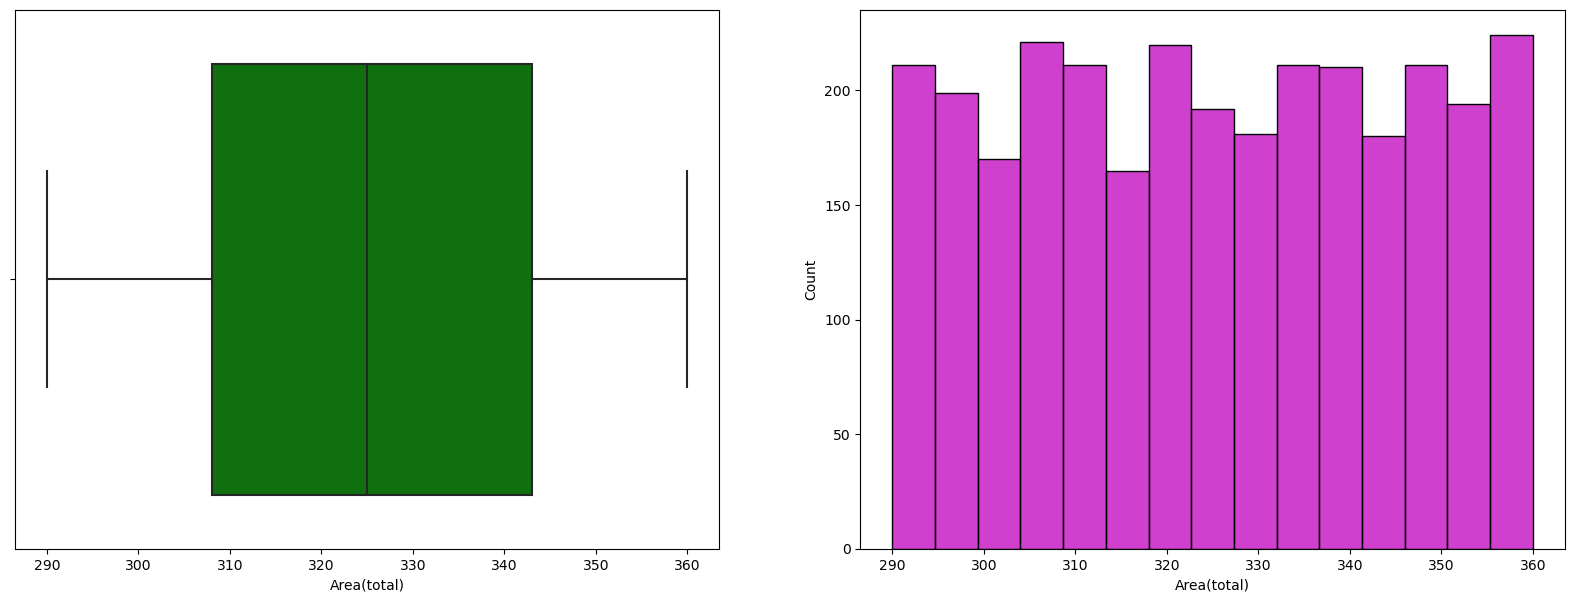

In [12]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Area(total)"], ax =ax[1], color = "m")
sns.boxplot(x = df["Area(total)"], ax = ax[0], color = "g")
plt.show()

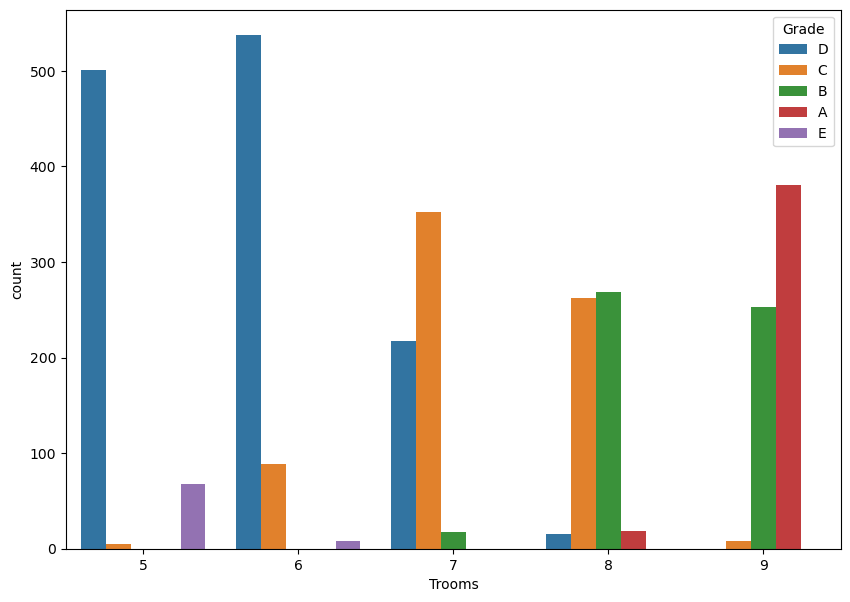

In [13]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Trooms", hue = "Grade", data = df)
plt.show()

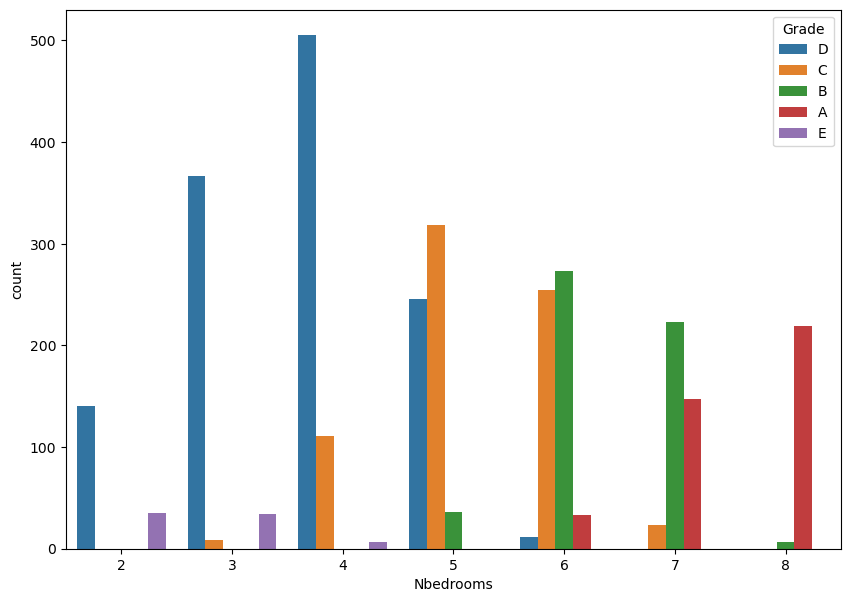

In [14]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Nbedrooms", hue = "Grade", data = df)
plt.show()

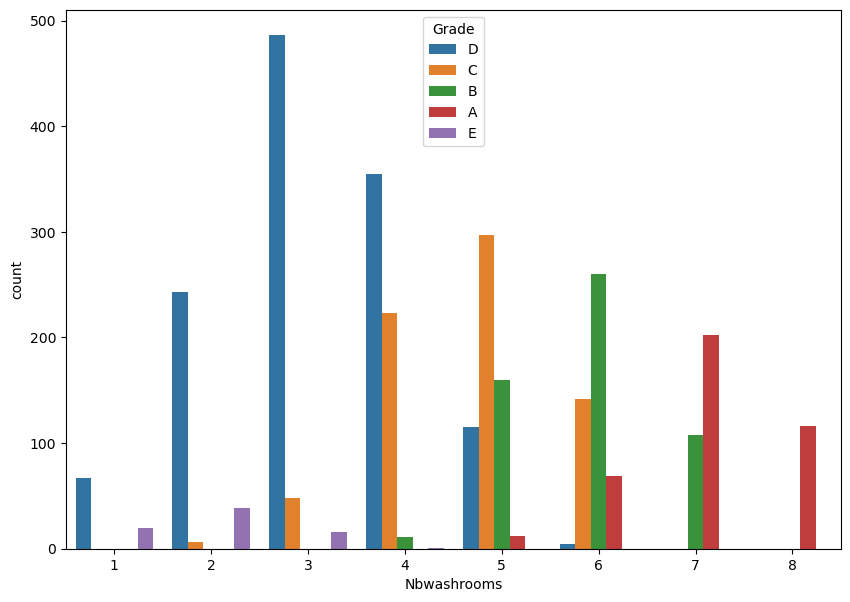

In [15]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Nbwashrooms", hue = "Grade", data = df)
plt.show()

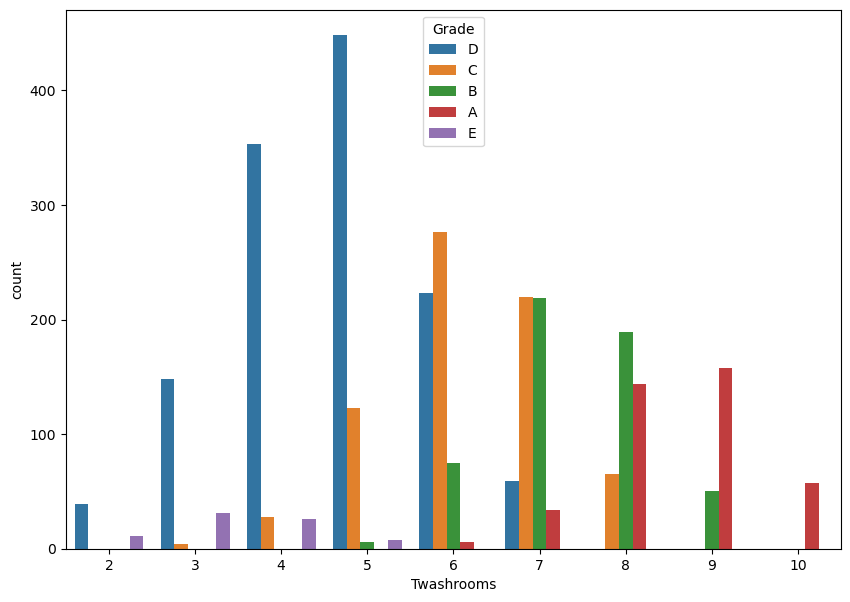

In [16]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Twashrooms", hue = "Grade", data = df)
plt.show()

### Interpretaion : From above graph we can see that Grade A , has maximum no of Trooms,Nbedrooms,Twashrooms,Nbwashrooms. Followed by "B" grade.

In [17]:
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


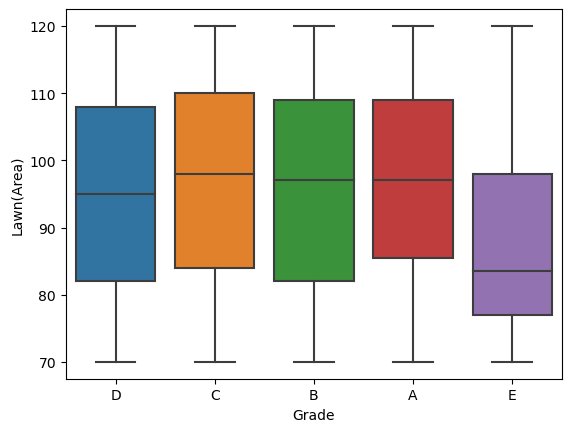

In [18]:
# plot box plot
sns.boxplot(y = df["Lawn(Area)"], x = df["Grade"])
plt.show()


### Interpreatation :- From above graph we can see that b grade hoses has maximum lawn area


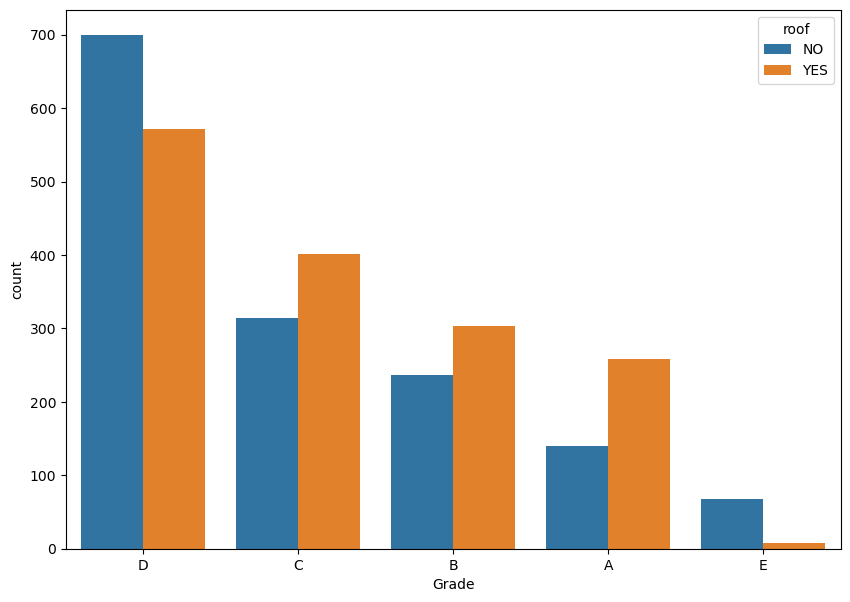

In [19]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Grade", hue = "roof", data = df)
plt.show()


### Interpretation : From above graph we can see that in d grade houses most of the house has no roof

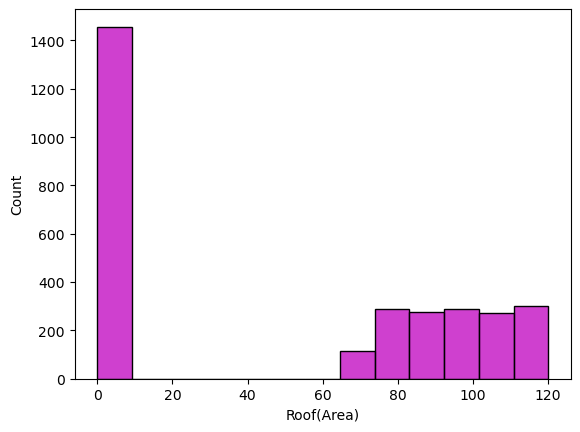

In [20]:
sns.histplot(x = df["Roof(Area)"], color = "m")
plt.show()

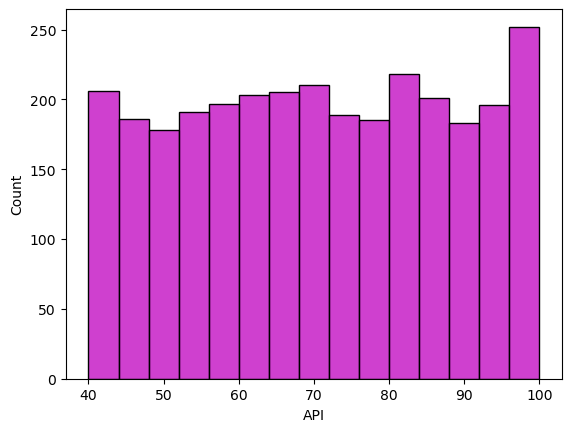

In [21]:
sns.histplot(x = df["API"], color = "m")
plt.show()

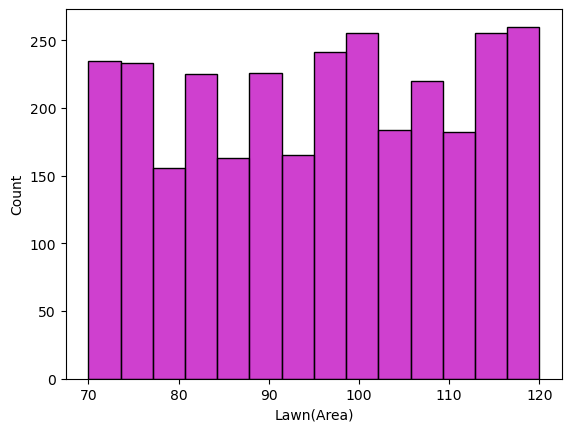

In [22]:
sns.histplot(x = df["Lawn(Area)"], color = "m")
plt.show()

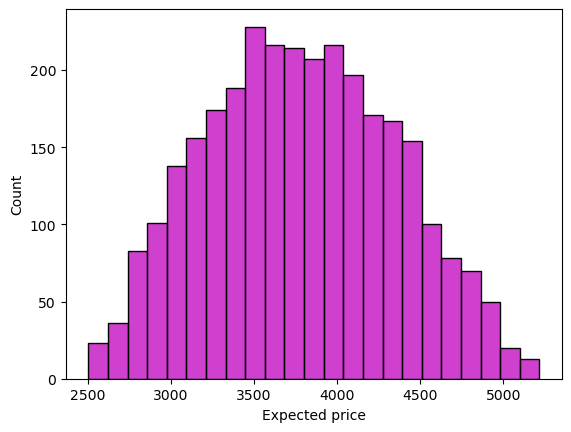

In [23]:
sns.histplot(x = df["Expected price"], color = "m")
plt.show()

### Interpretation :- From above graph we can see that expected price highly distibuted to 3000 to 4500

In [24]:
import matplotlib.pyplot as plt

def plot_scatter(df, X, y,color='violet'):
    
    plt.scatter(df[X], df[y], color= color)
    plt.xlabel(X)
    plt.ylabel(y)
    plt.show()

In [25]:
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


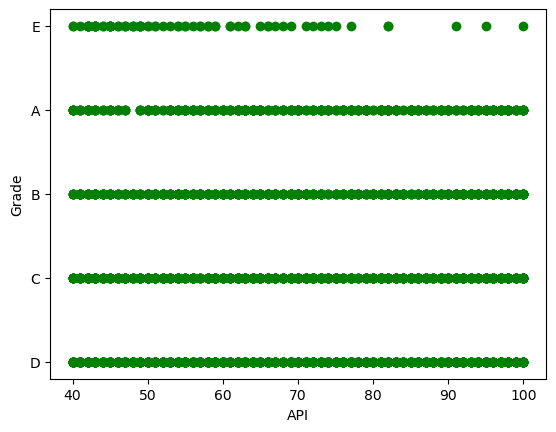

In [26]:
plot_scatter(df, "API", "Grade", color='g')

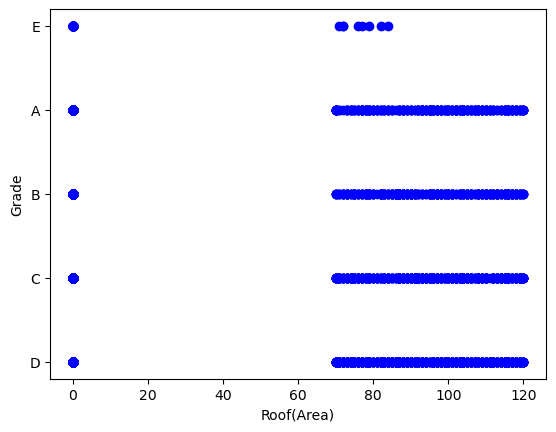

In [27]:
plot_scatter(df, "Roof(Area)", "Grade", color='b')

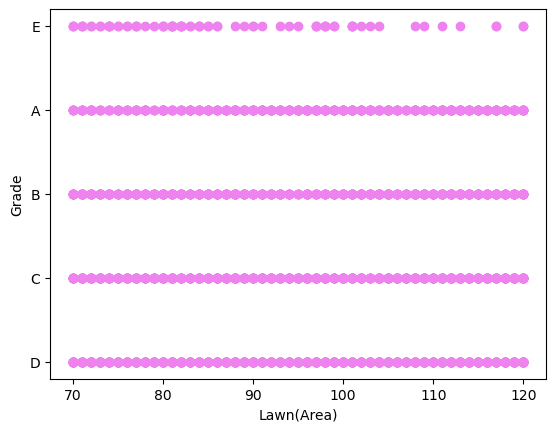

In [28]:
plot_scatter(df, "Lawn(Area)", "Grade", color='violet')

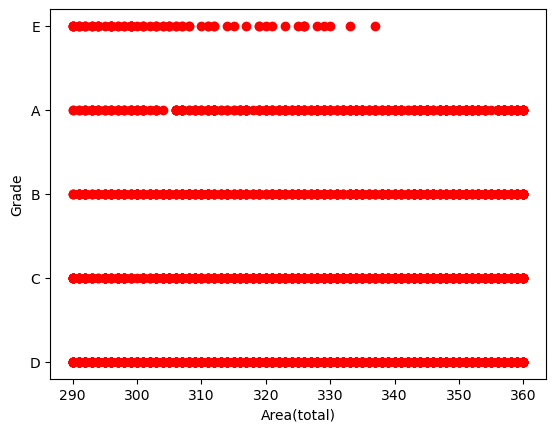

In [29]:
plot_scatter(df, "Area(total)", "Grade", color='red')

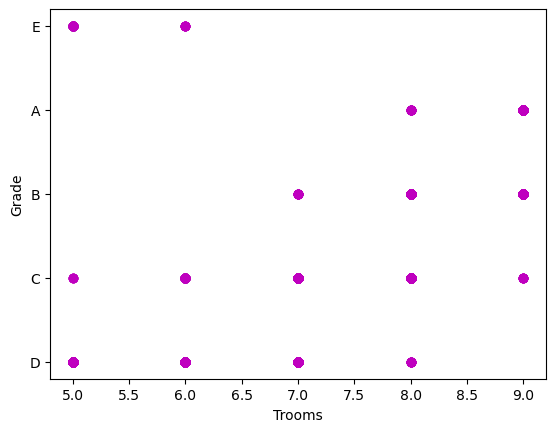

In [30]:
plot_scatter(df, "Trooms", "Grade", color='m')

# Data Preprocessing

## Label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [34]:
df.dtypes

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int32
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int32
dtype: object

## Correlation 

In [35]:
df.drop(columns = ["Id", "API", "ANB"], axis=1, inplace=True)

In [36]:
column_correlation = df.corr()
column_correlation

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,Expected price,Grade
Area(total),1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,0.274507,-0.177332
Trooms,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.820170,-0.875145
Nbedrooms,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.715687,-0.865389
Nbwashrooms,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.683659,-0.847319
Twashrooms,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.654627,-0.819280
roof,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,0.007880,-0.166635
Roof(Area),0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,0.009346,-0.170259
Lawn(Area),-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011561,-0.051200
Nfloors,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,0.714598,-0.787623
Expected price,0.274507,0.820170,0.715687,0.683659,0.654627,0.007880,0.009346,0.011561,0.714598,1.000000,-0.760820


In [37]:
df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,3481,3
1,358,5,4,3,4,1,71,96,3,3510,3
2,324,7,5,4,5,1,101,117,5,3748,2
3,330,6,4,3,5,1,101,82,2,3134,3
4,320,7,4,4,5,0,0,75,3,3843,3


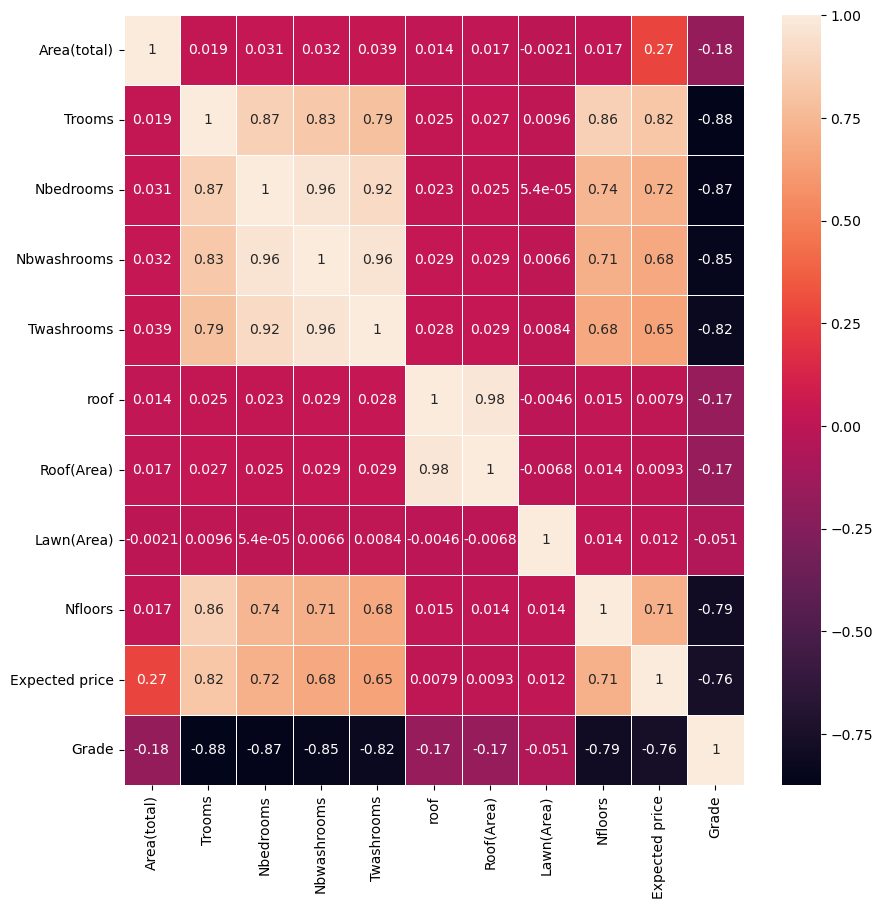

In [38]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(column_correlation,annot=True,linewidths=.5, ax=ax)

plt.show()

## Split the data into train and test

In [39]:
X = df.loc[:,["Area(total)","Trooms","Nbedrooms","Nbwashrooms","Twashrooms","roof","Roof(Area)","Lawn(Area)","Nfloors","Expected price"]]            # storing into x and y
y = df.loc[:,["Grade"]]

In [40]:
from sklearn.model_selection import train_test_split   # for splitting the data into train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)   

## scaling the data

In [41]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler  
scaler = MinMaxScaler() #standard
X_train = scaler.fit_transform(X_train)
#X_train=X_train(scale)
X_train

X_test = scaler.fit_transform(X_test)
X_test

array([[0.85714286, 0.5       , 0.66666667, ..., 0.8       , 0.66666667,
        0.59645745],
       [0.34285714, 0.5       , 0.66666667, ..., 0.32      , 0.66666667,
        0.37581825],
       [0.75714286, 0.        , 0.16666667, ..., 0.22      , 0.        ,
        0.20177127],
       ...,
       [0.61428571, 1.        , 0.66666667, ..., 0.78      , 0.83333333,
        0.68540624],
       [0.28571429, 0.25      , 0.33333333, ..., 0.18      , 0.5       ,
        0.41701964],
       [0.32857143, 0.        , 0.        , ..., 0.16      , 0.        ,
        0.32961109]])

# Model Building and Model Evaluation

## 1. Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

In [52]:
# Logistic Regression - training the model
logreg = LogisticRegression()
lr= logreg.fit(X_train,y_train)

# Using the trained model to predict the outcome of the X_Test dataset
y_pred = logreg.predict(X_test)


In [56]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
                                                                         # Accuracy = (TP+TN)/Total
print('accuracy:', accuracy_score(y_test, y_pred))                       # Accuracy = no of correct Pred/ total no of pred no
print('recall:', recall_score(y_test, y_pred,average='weighted'))        # recall = TP/(TP+FN)
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))          # F1-Score = 2TP/(2TP+FN+FP)
print('precision:', precision_score(y_test, y_pred,average='weighted'))  # precision = TP/(TP+FP)

accuracy: 0.9133333333333333
recall: 0.9133333333333333
f1-score: 0.9116629027301423
precision: 0.9154950142450142


## 2.Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB() 
classifier.fit(X_train, y_train) 


GaussianNB()

In [60]:
y_pred2 = classifier.predict(X_test) 

In [61]:
print('accuracy:', accuracy_score(y_test, y_pred2))                       # Accuracy = no of correct Pred/ total no of pred no
print('recall:', recall_score(y_test, y_pred2,average='weighted'))        # recall = TP/(TP+FN)
print('f1-score:', f1_score(y_test, y_pred2,average='weighted'))          # F1-Score = 2TP/(2TP+FN+FP)
print('precision:', precision_score(y_test, y_pred2,average='weighted'))  # precision = TP/(TP+FP)

accuracy: 0.8083333333333333
recall: 0.8083333333333333
f1-score: 0.8141197259434007
precision: 0.8269677941058157


## 3.  Decision Tree Based Algorithm

In [62]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [65]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=7)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred3 = clf.predict(X_test)

In [66]:
print('accuracy:', accuracy_score(y_test, y_pred3))                       # Accuracy = no of correct Pred/ total no of pred no
print('recall:', recall_score(y_test, y_pred3,average='weighted'))        # recall = TP/(TP+FN)
print('f1-score:', f1_score(y_test, y_pred3,average='weighted'))          # F1-Score = 2TP/(2TP+FN+FP)
print('precision:', precision_score(y_test, y_pred3,average='weighted'))  # precision = TP/(TP+FP)

accuracy: 0.845
recall: 0.845
f1-score: 0.8452280721280391
precision: 0.8493659076907148


## 4. Desicion Tree Classifier With Stratified kfold CV

In [88]:
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define the model
model = DecisionTreeClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
                           
# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

F1-Score: 0.825 (0.020)


## 5. Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

F1-Score: 0.878 (0.018)


## 6.Stacking

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [97]:
results, names = list(), list()

In [126]:
# get a stacking ensemble of models
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('dt', DecisionTreeClassifier()))
    level0.append(('nb', GaussianNB()))
    level0.append(("knn", KNeighborsClassifier()))
    level0.append(('svm', SVC()))
    
    # meta Model
    level1 = LogisticRegression()
    
    #Ensenmble Stacking 
    model = StackingClassifier( estimators= level0,
    final_estimator= level1 , cv= 11)
    return model

In [127]:
stacking_model = get_stacking()
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred5 = stacking_model.predict(X_test)

# Evaluate the performance of the model
score = stacking_model.score(X_test, y_test)
print('Accuracy: %.3f' % score)

Accuracy: 0.912


# Evaluation and comparison of all models

Models	Accuracy
Logistic Regression	0.91
Naive Bayes	0.8
Decision Tree	0.84
Desicion Tree Classifier With Stratified kfold CV	0.82
Random Forest	0.87
Stacking	0.91
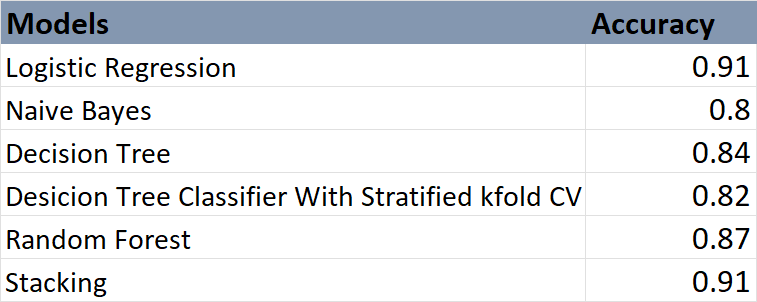

# Interpretation :
The Logistic Regression and Stacking models achieved the highest accuracy of 0.91. This means that these models were able to predict the target variable correctly around 91% of the time.

The Naive Bayes and Decision Tree models had a lower accuracy of 0.8 and 0.84, respectively. The decision tree model with stratified k-fold cross-validation achieved a slightly lower accuracy of 0.82.

The Random Forest model performed moderately well with an accuracy of 0.87.